In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from my_OIB_functions import *
import fatiando
import pandas as pd
%matplotlib inline

In [3]:
def oib_lineplot_cust(data, ptitle='test_lineplot', pname='test_lineplot'):
    import matplotlib.pyplot as plt
    data.loc[data['HYDROAPPX'] < -1500, 'HYDROAPPX'] = np.nan
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), facecolor='white')
    data['FAG070'].where((data['FLTENVIRO'] == 1)).plot(ax=axes[0], legend=True, label='Disturbed', style='r-')
    data['FAG070'].where((data['FLTENVIRO'] == 0)).plot(ax=axes[0], legend=True, label='Normal', style='k-')
    # data['FAG070'].where((data['FLTENVIRO'] == -1)).plot(ax=axes[0], legend=True, label='Missing', style='b-')
#     data['ELEVATION'].plot(ax=axes[1], legend=True, style='y.')
    data['ICEBASE'].plot(ax=axes[1], legend=True, marker=".", linestyle="None", color="brown")
    data['TOPOGRAPHY_radar'].plot(ax=axes[1], legend=True, marker=".", linestyle="None", color="blue")
#     data['HYDROAPPX'].plot(ax=axes[1], legend=True, color='grey')
    data['SURFACE_atm'].where((data['NUMUSED'] > 77)).plot(ax=axes[1], legend=True, 
                                                           marker=".", linestyle="None", color='cyan')
    plt.suptitle(ptitle, y=0.98)
#     plt.savefig(pname, bbox_inches='tight')   # save the figure to file
#     plt.close(fig)
    return


def haversine(origin, destination):
    # Source: http://www.platoscave.net/blog/2009/oct/5/calculate-distance-latitude-longitude-python/
    import math
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) \
                                                  * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(
        dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d


def make_outline(top, bottom):
    outline = np.append(top[0], np.concatenate([np.append(top, top[-1:]), np.append(bottom[-1:], bottom[::-1])], axis=0))
    outline = np.append(outline, bottom[0])
    outline = np.append(outline, top[0])
    return outline

def make_outline_dist(x, pad=1e6):
    xs = np.append(-pad, np.concatenate([np.append(x, np.max(x)+pad), np.append(np.max(x)+pad, x[::-1])], axis=0))
    xs = np.append(xs, -pad)
    xs = np.append(xs, -pad)
    return xs

## Read in an entire flight

In [4]:
df = pd.read_csv('data/agg2invert/OIB_ANT_2010-05-19.csv')
# oib_lineplot_cust(df)

## Read in an entire flight

In [5]:
gb = df.groupby(['LINE'])

# gb.describe()

# gb['FAG070'].describe()

# Group the dataframe by regiment, and for each regiment,
# for name, group in gb:
    # print(name)
    # print(group['FAG070'].describe())

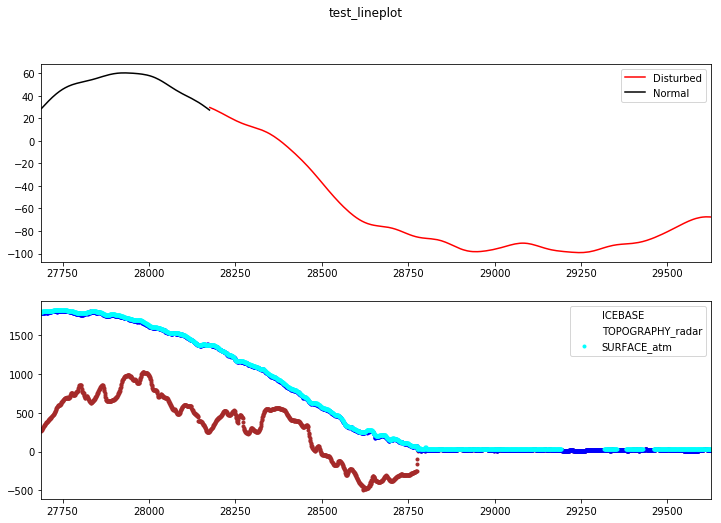

In [27]:
segment = 1274277755
# plt.plot(df['LINE'].where((df['LINE'] == segment)))
# oib_lineplot_cust(df.where((df['LINE'] == segment)))

# gb[["TIME", "FAG070"]].get_group(segment)
lf = gb.get_group(segment)
oib_lineplot_cust(lf)

In [28]:
lf.head()

,iunix,LAT,LONG,DATE,DOY,TIME,FLT,PSX,PSY,WGSHGT,...,SURFACE_radar,BOTTOM,QUALITY,SURFACE_atm,NUMUSED,ICEBASE,TOPOGRAPHY_radar,D_gravmask,LINE,HYDROAPPX
27689,2010-05-19 14:02:35.500,72.658552,-51.769381,2010-05-19,139,50555.5,26,-223068.90,-1879253.25,2210.22,...,434.57,1949.80,1.0,1790.8337,608.0,262.0974,1777.3274,1,1274277755,NaN
27690,2010-05-19 14:02:36.000,72.657918,-51.768901,2010-05-19,139,50556.0,26,-223061.42,-1879324.81,2211.29,...,434.58,1937.49,1.0,1791.2783,603.0,275.5374,1778.4474,1,1274277755,NaN
27691,2010-05-19 14:02:36.500,72.657284,-51.768429,2010-05-19,139,50556.5,26,-223054.20,-1879396.37,2212.35,...,434.60,1925.17,1.0,1791.7584,603.0,288.9532,1779.5232,1,1274277755,NaN
27692,2010-05-19 14:02:37.000,72.656650,-51.767963,2010-05-19,139,50557.0,26,-223047.21,-1879467.94,2213.39,...,434.61,1913.97,1.0,1801.5708,616.0,301.1545,1780.5145,1,1274277755,NaN
27693,2010-05-19 14:02:37.500,72.656015,-51.767505,2010-05-19,139,50557.5,26,-223040.48,-1879539.52,2214.40,...,434.61,1907.22,1.0,1801.5708,616.0,308.8415,1781.4515,1,1274277755,NaN


# Fatiando testing

In [29]:
from fatiando.gravmag import talwani
from fatiando.mesher import Polygon
from fatiando.vis import mpl
import numpy as np


rho_a = 0
rho_i = 915
rho_w = 1005
rho_r = 2670

## Crossing Horizons

In [30]:
# df.ix[selection criteria, columns I want] = value
lf.ix[lf['SURFACE_atm']-lf['ICEBASE'] <= 0, 'ICEBASE'] = (lf['SURFACE_atm'] - 0.1)
# lf['ICEBASE_adj'] = lf['ICEBASE'].where(lf['SURFACE_atm']-lf['ICEBASE'] <= 0)

In [31]:
lf['TIME'].values[1]

50556.0

## Read in an entire flight

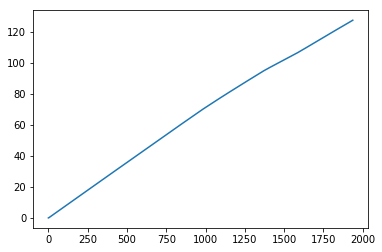

In [32]:
# Compute distance along transect
dist = np.zeros((np.size(lf['LONG'])))
for i in range(2, np.size(lf['LONG'])):
    dist[i] = dist[i - 1] + haversine([lf['LAT'].values[i - 1],lf['LONG'].values[i - 1]],
              [lf['LAT'].values[i],lf['LONG'].values[i]])
plt.plot(dist)

In [33]:
lf.columns

Index([u'iunix', u'LAT', u'LONG', u'DATE', u'DOY', u'TIME', u'FLT', u'PSX',
       u'PSY', u'WGSHGT', u'FX', u'FY', u'FZ', u'EOTGRAV', u'FACOR', u'INTCOR',
       u'FAG070', u'FAG100', u'FAG140', u'FLTENVIRO', u'UNIX', u'THICK',
       u'ELEVATION', u'FRAME', u'SURFACE_radar', u'BOTTOM', u'QUALITY',
       u'SURFACE_atm', u'NUMUSED', u'ICEBASE', u'TOPOGRAPHY_radar',
       u'D_gravmask', u'LINE', u'HYDROAPPX'],
      dtype='object')

In [34]:
print lf.loc[:, 'TIME'].values
print lf.ix[:, 'TIME'].values
print lf.iloc[0:3, 5]
lf.loc[27689:, 'TIME'].values
# int(np.max(icesfc)+1)

[ 50555.5  50556.   50556.5 ...,  51523.   51523.5  51524. ]
[ 50555.5  50556.   50556.5 ...,  51523.   51523.5  51524. ]
27689    50555.5
27690    50556.0
27691    50556.5
Name: TIME, dtype: float64


array([ 50555.5,  50556. ,  50556.5, ...,  51523. ,  51523.5,  51524. ])

# Model Setup

## ADD block extensions

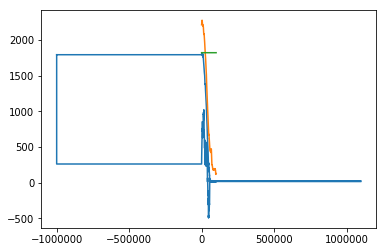

In [35]:
'''
Extract data from DataFrame
'''
fag070 = lf['FAG070'][0:].values
elevation = lf['WGSHGT'][0:].values
icesfc = lf['SURFACE_atm'][0:].values
icebase = lf['ICEBASE'][0:].values
'''
Convert OIB data to polygon arrays
'''
# iceoutline = np.append(np.concatenate([icesfc, icebase[::-1]], axis=0), icesfc[0]) # no extension
iceoutline = make_outline(icesfc, icebase)
# plt.figure(facecolor='white'); plt.plot(iceoutline[1180:1220])

rockbase = -30000*np.ones_like(icebase)
# rockoutline = np.append(icebase[0], np.concatenate([icebase, z_r], axis=0), icebase[0], icebase[0])
rockoutline = make_outline(icebase, rockbase)

x = np.linspace(0, 100000, len(icebase))#[::-1]
xs = make_outline_dist(x, 1e6)
# plt.figure(facecolor='white'); plt.plot(xs[1180:1220])

# depths of calculations points
# z = elevation + 2000
z = int(np.max(icesfc)+1)*np.ones_like(x)

plt.figure(facecolor='white')
plt.plot(xs, iceoutline) 
plt.plot(x, elevation)
plt.plot(x, z) 
'''
Build the Polygon
'''
props = {'density': rho_i}
props2 = {'density': rho_r}
polygon = Polygon(np.transpose([xs, iceoutline]), props)
polygons = [Polygon(np.transpose([xs, iceoutline]), props), 
            Polygon(np.transpose([xs, rockoutline]), props2)
            ]

## One Block

46.0375719942


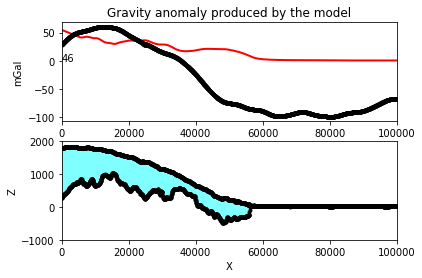

In [15]:
'''
Forward Model
'''
gz = talwani.gz(x, z, [polygon])
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print rmse
'''
Plot
'''
mpl.figure(facecolor='white')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz, '-r', linewidth=2)
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, '.-k', linewidth=2)
mpl.xlim(min(x), max(x))
mpl.ylabel("mGal")
ax1.annotate(str(int(rmse)), xy=(100, 0), xytext=(100, 0))
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygon, '.-k', linewidth=1, fill='cyan', alpha=0.5)
# mpl.polygon(polygons[1], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.xlim(min(x), max(x))
mpl.ylim(-1000, 2000)
mpl.xlabel("X")
mpl.ylabel("Z")
mpl.show()

## TWO blocks

3399.46437669
16.9447781272


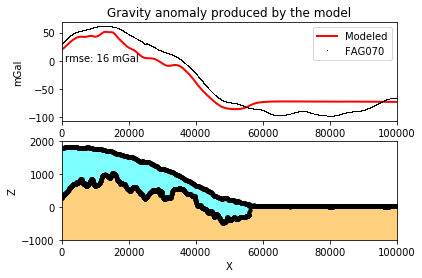

In [16]:
'''
Forward Model
'''
gz = talwani.gz(x, z, polygons)
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print (np.mean(gz) - np.mean(fag070))
print rmse
'''
Plot
'''
###
mpl.figure(facecolor='white')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz_adj, '-r', linewidth=2, label='Modeled')
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, color='k', linestyle="None", marker=',', label='FAG070')
mpl.xlim(min(x), max(x))
mpl.ylabel("mGal")
mpl.legend()
ax1.annotate('rmse: '+str(int(rmse))+' mGal', xy=(1000, 0), xytext=(1000, 0))
###
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygons[0], '.-k', linewidth=1, fill='cyan', alpha=0.5)
mpl.polygon(polygons[1], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.xlim(min(x), max(x))
mpl.ylim(-1000, 2000)
mpl.xlabel("X")
mpl.ylabel("Z")
mpl.savefig('figs/test_OIB_forward.png', bbox_inches='tight')
mpl.show()

## NO block extension

304.60493981


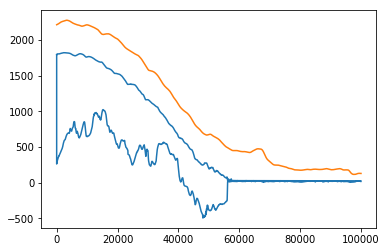

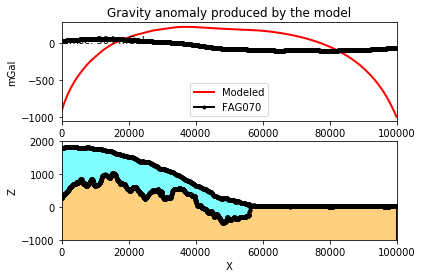

In [17]:
x = np.linspace(0, 100000, len(icebase))#[::-1]
xs = make_outline_dist(x, 1e1)

plt.figure(facecolor='white'); plt.plot(xs, iceoutline); plt.plot(x, elevation)
'''
Build the Polygon
'''
props = {'density': rho_r - rho_i}
props2 = {'density': rho_r}
polygon = Polygon(np.transpose([xs, iceoutline]), props)
polygons = [Polygon(np.transpose([xs, iceoutline]), props), 
            Polygon(np.transpose([xs, rockoutline]), props2)
            ]
'''
Forward Model
'''
gz = talwani.gz(x, z, polygons)
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print rmse
'''
Plot
'''
###
mpl.figure(facecolor='white')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz_adj, '-r', linewidth=2, label='Modeled')
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, '.-k', linewidth=2, label='FAG070')
mpl.xlim(min(x), max(x))
mpl.ylabel("mGal")
mpl.legend()
ax1.annotate('rmse: '+str(int(rmse))+' mGal', xy=(1000, 0), xytext=(1000, 0))
###
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygons[0], '.-k', linewidth=1, fill='cyan', alpha=0.5)
mpl.polygon(polygons[1], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.xlim(min(x), max(x))
mpl.ylim(-1000, 2000)
mpl.xlabel("X")
mpl.ylabel("Z")
mpl.savefig('figs/test_OIB_forward.png', bbox_inches='tight')
mpl.show()

## Using Real Distances

16.7655609176


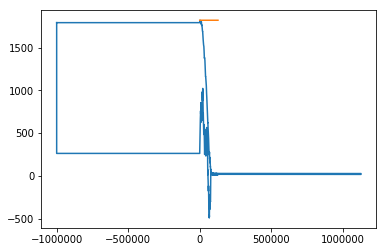

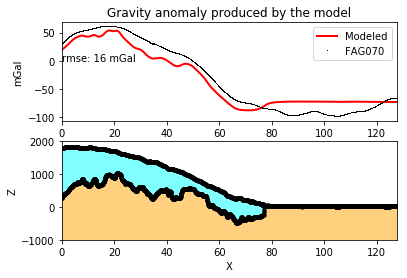

In [36]:
x = dist * 1000
xs = make_outline_dist(x, 1e6)
# plt.figure(facecolor='white'); plt.plot(xs[1180:1220])

plt.figure(facecolor='white')
plt.plot(xs, iceoutline) 
# plt.plot(x, elevation)
plt.plot(x, z) 
'''
Build the Polygon
'''
props = {'density': rho_i}
props2 = {'density': rho_r}
polygon = Polygon(np.transpose([xs, iceoutline]), props)
polygons = [Polygon(np.transpose([xs, iceoutline]), props), 
            Polygon(np.transpose([xs, rockoutline]), props2)
            ]
'''
Forward Model
'''
gz = talwani.gz(x, z, polygons)
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print rmse
'''
Plot
'''
###
mpl.figure(facecolor='white')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz_adj, '-r', linewidth=2, label='Modeled')
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, color='k', linestyle="None", marker=',', label='FAG070')
mpl.xlim(min(x), max(x))
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e3))
ax1.xaxis.set_major_formatter(ticks_x)
mpl.ylabel("mGal")
mpl.legend()
ax1.annotate('rmse: '+str(int(rmse))+' mGal', xy=(10, 0), xytext=(10, 0))
###
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygons[0], '.-k', linewidth=1, fill='cyan', alpha=0.5)
mpl.polygon(polygons[1], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.xlim(min(x), max(x))
mpl.ylim(-1000, 2000)
mpl.xlabel("X")
mpl.ylabel("Z")
ax2.xaxis.set_major_formatter(ticks_x)
mpl.savefig('figs/test_OIB_'+str(segment)+'_forward.png', bbox_inches='tight')
mpl.show()

## Test elevation ("z") of forward model calculations 

16.7655609176


16.9312760822


19.1538691456


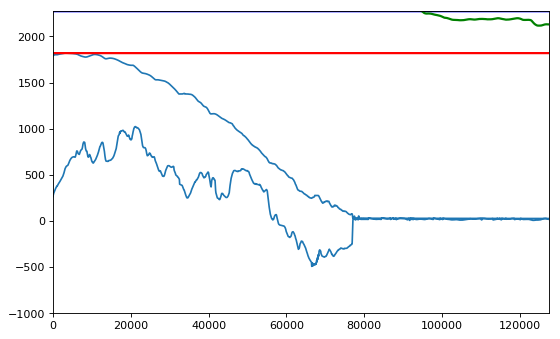

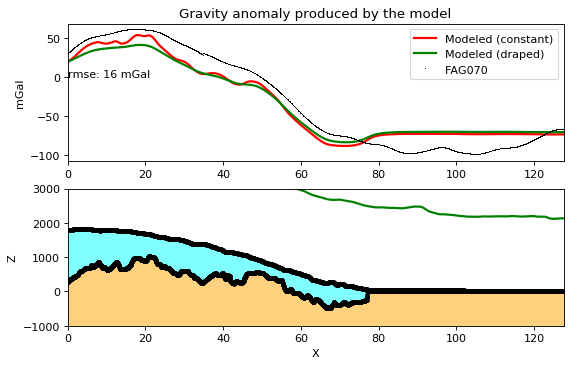

In [40]:
# depths of calculations points
z = int(np.max(icesfc)+1)*np.ones_like(x)

'''
Build the Polygon
'''
props = {'density': rho_i}
props2 = {'density': rho_r}
polygon = Polygon(np.transpose([xs, iceoutline]), props)
polygons = [Polygon(np.transpose([xs, iceoutline]), props), 
            Polygon(np.transpose([xs, rockoutline]), props2)
            ]
'''
Forward Model
'''
gz = talwani.gz(x, z, polygons)
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print rmse
'''
Forward Model #2 (modify Z)
'''
z2 = np.max(elevation)*np.ones_like(x) #elevation + int(np.max(icesfc)+1)
gz = talwani.gz(x, z2, polygons)
gz_adj2 = (gz - np.mean(gz)) + np.mean(fag070)
rmse2 = np.linalg.norm(gz_adj2 - fag070) / np.sqrt(n)
print rmse2
'''
Forward Model #2 (modify Z)
'''
z3 = elevation + 2000
gz = talwani.gz(x, z3, polygons)
gz_adj3 = (gz - np.mean(gz)) + np.mean(fag070)
rmse3 = np.linalg.norm(gz_adj3 - fag070) / np.sqrt(n)
print rmse3
'''
Plot
'''
### Horizons
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xs, iceoutline) 
# plt.plot(x, icebase, linewidth=1, color='orange', alpha=0.5)
plt.plot(x, z, '-r', linewidth=2, label='Modeled (constant)')
plt.plot(x, z2, '-b', linewidth=2, label='Modeled')
plt.plot(x, z3, '-g', linewidth=2, label='Modeled (draped)')

plt.xlim(min(x), max(x))
plt.ylim(-1000, max(z2))
# plt.legend()

### Model results
mpl.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz_adj, '-r', linewidth=2, label='Modeled (constant)')
# mpl.plot(x, gz_adj2, '-b', linewidth=2, label='Modeled')
mpl.plot(x, gz_adj3, '-g', linewidth=2, label='Modeled (draped)')
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, color='k', linestyle="None", marker=',', label='FAG070')
mpl.xlim(min(x), max(x))
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e3))
ax1.xaxis.set_major_formatter(ticks_x)
mpl.ylabel("mGal")
mpl.legend()
# ax1.annotate('rmse: '+str(int(rmse))+' mGal', 
#              xy=(min(x)*1.1, np.mean(gz)*1.1), xytext=(min(x)*1.1, np.mean(gz)*1.1))
ax1.annotate('rmse: '+str(int(rmse))+' mGal', 
             xy=(10,0), xytext=(10,0))
###
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygons[0], '.-k', linewidth=1, fill='cyan', alpha=0.5)
mpl.polygon(polygons[1], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.plot(x, z3, '-g', linewidth=2, label='Modeled (draped)')
mpl.xlim(min(x), max(x))
mpl.ylim(-1000, 3000)
mpl.xlabel("X")
mpl.ylabel("Z")
ax2.xaxis.set_major_formatter(ticks_x)
mpl.savefig('figs/test_OIB_'+str(segment)+'_forward.png', bbox_inches='tight')
mpl.show()

# Some other segments

### 1) All grounded

22.287736566


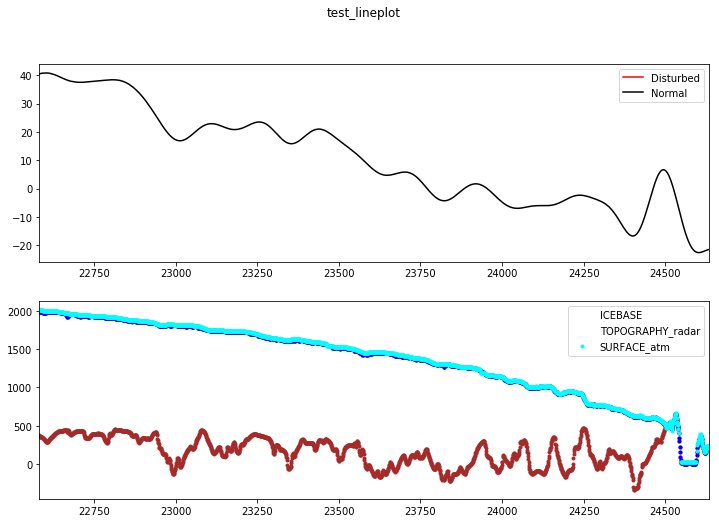

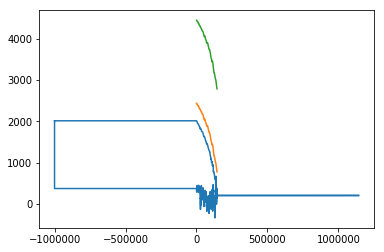

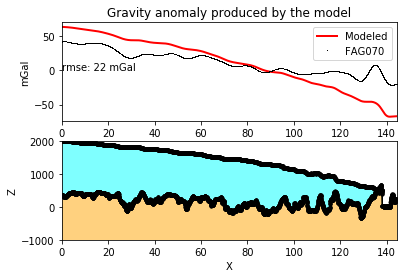

In [20]:
segment = 1274275202
# gb[["TIME", "FAG070"]].get_group(segment)
lf = gb.get_group(segment)
oib_lineplot_cust(lf)
lf.ix[lf['SURFACE_atm']-lf['ICEBASE'] <= 0, 'ICEBASE'] = (lf['SURFACE_atm'] - 0.1)

# Compute distance along transect
dist = np.zeros((np.size(lf['LONG'])))
for i in range(2, np.size(lf['LONG'])):
    dist[i] = dist[i - 1] + haversine([lf['LAT'].values[i - 1],lf['LONG'].values[i - 1]],
              [lf['LAT'].values[i],lf['LONG'].values[i]])
'''
Extract data from DataFrame
'''
fag070 = lf['FAG070'][0:].values
elevation = lf['WGSHGT'][0:].values
icesfc = lf['SURFACE_atm'][0:].values
icebase = lf['ICEBASE'][0:].values
'''
Convert OIB data to polygon arrays
'''
# iceoutline = np.append(np.concatenate([icesfc, icebase[::-1]], axis=0), icesfc[0]) # no extension
iceoutline = make_outline(icesfc, icebase)
# plt.figure(facecolor='white'); plt.plot(iceoutline[1180:1220])

rockbase = -30000*np.ones_like(icebase)
# rockoutline = np.append(icebase[0], np.concatenate([icebase, z_r], axis=0), icebase[0], icebase[0])
rockoutline = make_outline(icebase, rockbase)

x = dist * 1000
xs = make_outline_dist(x, 1e6)
# plt.figure(facecolor='white'); plt.plot(xs[1180:1220])

# depths of calculations points
z = elevation + int(np.max(icesfc)+1)
# z = int(np.max(icesfc)+1)*np.ones_like(x)


plt.figure(facecolor='white')
plt.plot(xs, iceoutline) 
plt.plot(x, elevation)
plt.plot(x, z) 
'''
Build the Polygon
'''
props = {'density': rho_r - rho_i}
props2 = {'density': rho_r}
polygon = Polygon(np.transpose([xs, iceoutline]), props)
polygons = [Polygon(np.transpose([xs, iceoutline]), props), 
            Polygon(np.transpose([xs, rockoutline]), props2)
            ]
'''
Forward Model
'''
gz = talwani.gz(x, z, polygons)
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print rmse
'''
Plot
'''
###
mpl.figure(facecolor='white')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz_adj, '-r', linewidth=2, label='Modeled')
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, color='k', linestyle="None", marker=',', label='FAG070')
mpl.xlim(min(x), max(x))
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e3))
ax1.xaxis.set_major_formatter(ticks_x)
mpl.ylabel("mGal")
mpl.legend()
ax1.annotate('rmse: '+str(int(rmse))+' mGal', xy=(10, 0), xytext=(10, 0))
###
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygons[0], '.-k', linewidth=1, fill='cyan', alpha=0.5)
mpl.polygon(polygons[1], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.xlim(min(x), max(x))
mpl.ylim(-1000, 2000)
mpl.xlabel("X")
mpl.ylabel("Z")
ax2.xaxis.set_major_formatter(ticks_x)
mpl.savefig('figs/test_OIB_'+str(segment)+'_forward.png', bbox_inches='tight')
mpl.show()

### 2) No ice base?

3.6323105069


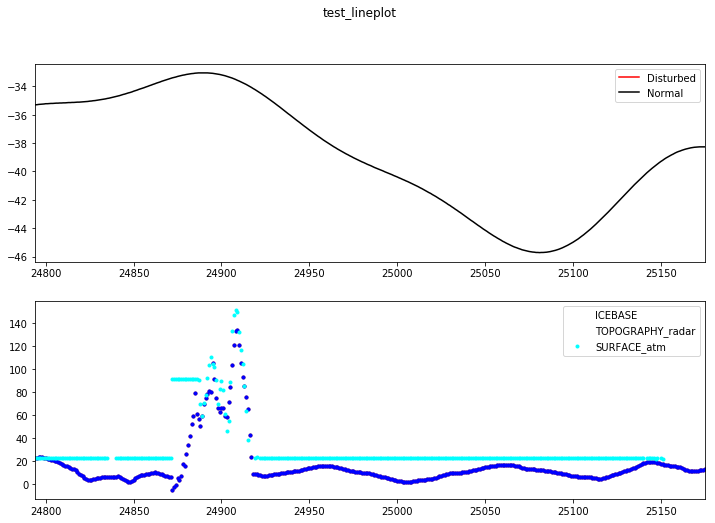

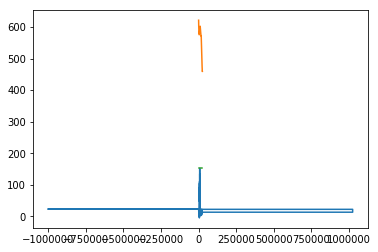

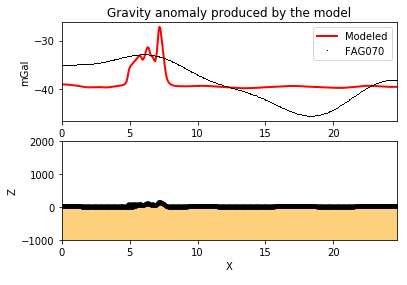

In [21]:
segment = 1274276308
# gb[["TIME", "FAG070"]].get_group(segment)
lf = gb.get_group(segment)
oib_lineplot_cust(lf)
lf.ix[lf['SURFACE_atm']-lf['ICEBASE'] <= 0, 'ICEBASE'] = (lf['SURFACE_atm'] - 0.1)

# Compute distance along transect
dist = np.zeros((np.size(lf['LONG'])))
for i in range(2, np.size(lf['LONG'])):
    dist[i] = dist[i - 1] + haversine([lf['LAT'].values[i - 1],lf['LONG'].values[i - 1]],
              [lf['LAT'].values[i],lf['LONG'].values[i]])
'''
Extract data from DataFrame
'''
fag070 = lf['FAG070'][0:].values
elevation = lf['WGSHGT'][0:].values
icesfc = lf['SURFACE_atm'][0:].values
icebase = lf['ICEBASE'][0:].values
'''
Convert OIB data to polygon arrays
'''
# iceoutline = np.append(np.concatenate([icesfc, icebase[::-1]], axis=0), icesfc[0]) # no extension
iceoutline = make_outline(icesfc, icebase)
# plt.figure(facecolor='white'); plt.plot(iceoutline[1180:1220])

rockbase = -30000*np.ones_like(icebase)
# rockoutline = np.append(icebase[0], np.concatenate([icebase, z_r], axis=0), icebase[0], icebase[0])
rockoutline = make_outline(icebase, rockbase)

x = dist * 1000
xs = make_outline_dist(x, 1e6)
# plt.figure(facecolor='white'); plt.plot(xs[1180:1220])

# depths of calculations points
# z = elevation + 2000
z = int(np.max(icesfc)+1)*np.ones_like(x)

plt.figure(facecolor='white')
plt.plot(xs, iceoutline) 
plt.plot(x, elevation)
plt.plot(x, z) 
'''
Build the Polygon
'''
props = {'density': rho_r - rho_i}
props2 = {'density': rho_r}
polygon = Polygon(np.transpose([xs, iceoutline]), props)
polygons = [Polygon(np.transpose([xs, iceoutline]), props), 
            Polygon(np.transpose([xs, rockoutline]), props2)
            ]
'''
Forward Model
'''
gz = talwani.gz(x, z, polygons)
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print rmse
'''
Plot
'''
###
mpl.figure(facecolor='white')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz_adj, '-r', linewidth=2, label='Modeled')
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, color='k', linestyle="None", marker=',', label='FAG070')
mpl.xlim(min(x), max(x))
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e3))
ax1.xaxis.set_major_formatter(ticks_x)
mpl.ylabel("mGal")
mpl.legend()
ax1.annotate('rmse: '+str(int(rmse))+' mGal', xy=(10, 0), xytext=(10, 0))
###
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygons[0], '.-k', linewidth=1, fill='cyan', alpha=0.5)
mpl.polygon(polygons[1], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.xlim(min(x), max(x))
mpl.ylim(-1000, 2000)
mpl.xlabel("X")
mpl.ylabel("Z")
ax2.xaxis.set_major_formatter(ticks_x)
mpl.savefig('figs/test_OIB_'+str(segment)+'_forward.png', bbox_inches='tight')
mpl.show()

## For FUN, let's try inverting

In [22]:
from fatiando.inversion import Smoothness1D
from fatiando.gravmag.basin2d import PolygonalBasinGravity
from fatiando import utils

# Make the solver using smoothness regularization and run the inversion
misfit = PolygonalBasinGravity(x, z, fag070, 100, props, top=0)
regul = Smoothness1D(misfit.nparams)
solver = misfit + 1e-4*regul
# print dir(misfit)

# This is a non-linear problem so we need to pick an initial estimate
initial = -100*np.ones(misfit.nparams)
solver.config('levmarq', initial=initial).fit()
# solver.estimate_.vertices

/usr/local/lib/python2.7/site-packages/fatiando/inversion/optimization.py:302: RuntimeWarning: Exited because maximum iterations reached. Might not have achieved convergence. Try inscreasing the maximum number of iterations allowed.
  RuntimeWarning)


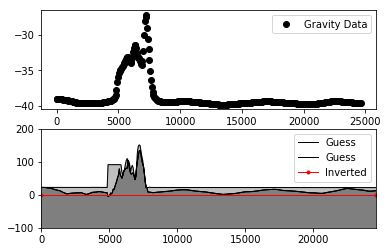

In [23]:
mpl.figure(facecolor='white')
mpl.subplot(2, 1, 1)
mpl.plot(x, gz_adj, 'ok', label='Gravity Data')
# mpl.plot(x, solver[0].predicted(), '-r', linewidth=2, label='predicted Gravity')
mpl.legend()
ax = mpl.subplot(2, 1, 2)
mpl.polygon(polygons[0], fill='gray', alpha=0.5, label='Guess')
mpl.polygon(polygons[1], fill='black', alpha=0.5, label='Guess')
# The estimate_ property of our solver gives us the estimate basin as a polygon
# So we can directly pass it to plotting and forward modeling functions
# mpl.plot(x[:70], depths[:29:-1], color='black', linewidth=10, label='Constraints')
mpl.polygon(solver.estimate_, style='.-r', label='Inverted')
# ax.invert_yaxis()
mpl.xlim(min(x), max(x))
mpl.ylim(-100, 200)
mpl.legend()
mpl.show()

# Sample regional gravity

In [23]:
T = pickle.load(open('antgg2015_bouger.p','rb'))

# Compute bathymetry
lon = lf['LONG'][0:].values
lat = lf['LAT'][0:].values
    
fag = np.zeros((np.size(lon)))
for i in range(np.size(lon)):
    cost_func = ((T['lons']-lon[i])**2) + ((T['lats']-lat[i])**2)
    xmin, ymin = np.unravel_index(cost_func.argmin(), cost_func.shape)
    fag[i] = -T['ell'][xmin, ymin]

NameError: name 'pickle' is not defined

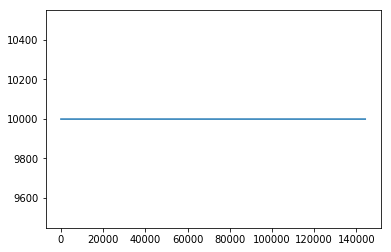

In [ ]:
plt.plot(x, fag)

# DEBUGGING

In [ ]:
bottom = np.array(lf['ICEBASE'])
# bottom = lf['BED_flat']
print bottom
# print lf['BED_flat'][28767]
# lf['BED_flat'][28767:b]
# lf['BED_flat'][0:]

[ 262.0974  275.5374  288.9532 ...,   17.8396   17.2373   16.6203]
